<AxesSubplot:>

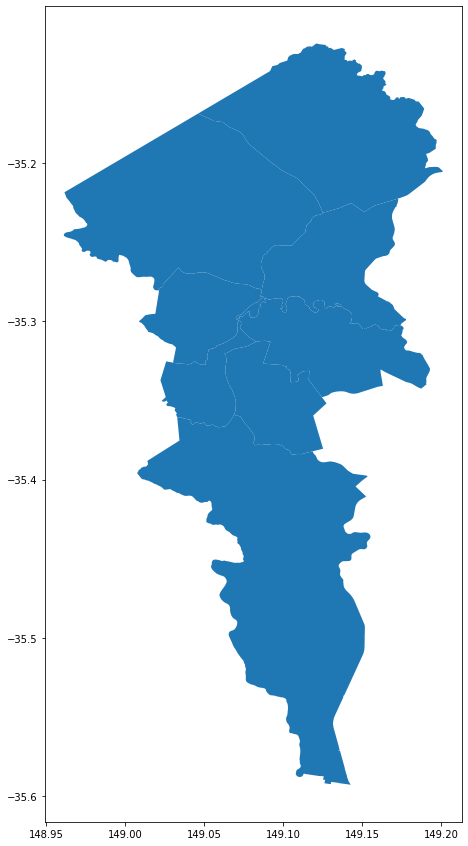

In [58]:
import pandas as pd
import geopandas as gpd

shapes = gpd.read_file("./1270055001_sa3_2016_aust_shape.zip")
shapes.set_index("SA3_CODE16", inplace=True)
data_act = pd.read_excel("https://www.health.gov.au/sites/default/files/documents/2021/09/covid-19-vaccination-geographic-vaccination-rates-sa3-6-september-2021-covid-19-vaccination-geographic-vaccination-rates-sa3.xlsx",
                         usecols=[0, 1, 2, 3, 6], names=["state", "code", "name", "pop", "first_dose"])
data_act = data_act[(data_act["state"] == "Australian Capital Territory") & (data_act["pop"] > 2500)][["code", "name", "first_dose"]]
data_act.set_index("code", inplace=True)

geoData = gpd.GeoDataFrame()
geoData["name"] = data_act["name"]
geoData["first_dose"] = data_act["first_dose"]
for i in geoData.index:
    geoData.at[i, "geometry"] = shapes.at[str(i), "geometry"]

geoData.to_file("./districts.geojson", driver="GeoJSON")
geoData.plot(figsize=(10, 15))